# Predicting SG house pricing

So I want to find a place in SG with a reasonable price, I look for data first. After a few Google searches, I found this [website](https://www.ura.gov.sg/realEstateIIWeb/resiRental/search.action), and downloaded the datasets from the districts I was considering. Lets do some EDA first to get a feel of the data. 

## Exploratory Data Analysis (EDA)

In [149]:
import pandas as pd
housing_data = pd.read_csv('data/rental_contracts_sg.csv', skiprows=2)
housing_data.head()

,S/N,Building/Project Name,Street Name,Postal District,Type,No. of Bedroom(for Non-Landed Only),Monthly Gross Rent($),Floor Area (sq m),Lease Commencement Date
0,1,THE FLORAVALE,WESTWOOD AVENUE,22.0,Executive Condominium,3.0,2400.0,120 to 130,Jan-2018
1,2,WOODSVALE,WOODLANDS DRIVE 72,25.0,Executive Condominium,3.0,2300.0,110 to 120,Jan-2018
2,3,NORTHOAKS,WOODLANDS CRESCENT,25.0,Executive Condominium,2.0,2000.0,90 to 100,Jan-2018
3,4,LA CASA,WOODLANDS DRIVE 16,25.0,Executive Condominium,2.0,2000.0,90 to 100,Jan-2018
4,5,THE FLORAVALE,WESTWOOD AVENUE,22.0,Executive Condominium,3.0,2500.0,130 to 140,Jan-2018


## Cleaning up...
When getting data online, we usually have *messy* or *not cleaned up* information. Let me show you what I mean.

In [150]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528 entries, 0 to 1527
Data columns (total 9 columns):
S/N                                    1527 non-null object
Building/Project Name                  1524 non-null object
Street Name                            1524 non-null object
Postal District                        1524 non-null float64
Type                                   1524 non-null object
No. of Bedroom(for Non-Landed Only)    1523 non-null float64
Monthly Gross Rent($)                  1523 non-null float64
Floor Area (sq m)                      1523 non-null object
Lease Commencement Date                1523 non-null object
dtypes: float64(3), object(6)
memory usage: 107.5+ KB


* First, we see that we don't have consistent numbers o f rows for each column.
* The postal district column should actually be an *integer*, rather than an *float64*.
* Floor areas are *objects* because the data in this column is actually a range of the unit area, e.g. 120 to 130 for 1th entry.
Let's have a look at the last rows first.

In [151]:
housing_data.tail()

,S/N,Building/Project Name,Street Name,Postal District,Type,No. of Bedroom(for Non-Landed Only),Monthly Gross Rent($),Floor Area (sq m),Lease Commencement Date
1523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1524,1523 record(s) retrieved based on user-specifi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1525,Search By Property Type (Executive Condominiums),From Date (FEB-2015),To Date (JAN-2018) & Postal Districts: 20,22.0,25,NaN,NaN,NaN,NaN
1526,Notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1527,"To convert Sqm to Sqft, multiply by a factor 1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Shocks! I also took the comments at the end of the csv file, we obviously need to remove this. But please take note that information or comments at the end of the file may be valuable in explaining the dataset. But let's just remove it for now.

In [153]:
housing_data = housing_data.iloc[:1523]
housing_data.tail()

,S/N,Building/Project Name,Street Name,Postal District,Type,No. of Bedroom(for Non-Landed Only),Monthly Gross Rent($),Floor Area (sq m),Lease Commencement Date
1518,1519,LA CASA,WOODLANDS DRIVE 16,25.0,Executive Condominium,2.0,2000.0,90 to 100,Feb-2015
1519,1520,NORTHOAKS,WOODLANDS CRESCENT,25.0,Executive Condominium,2.0,2400.0,90 to 100,Feb-2015
1520,1521,BISHAN LOFT,BISHAN STREET 11,20.0,Executive Condominium,3.0,4300.0,120 to 130,Feb-2015
1521,1522,SUMMERDALE,BOON LAY DRIVE,22.0,Executive Condominium,3.0,2800.0,110 to 120,Feb-2015
1522,1523,SUMMERDALE,BOON LAY DRIVE,22.0,Executive Condominium,3.0,3000.0,110 to 120,Feb-2015


Looks good. Now we should fix the postal district data type.

In [170]:
housing_data['Postal District']=housing_data['Postal District'].astype('int')
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 9 columns):
S/N                                    1523 non-null object
Building/Project Name                  1523 non-null object
Street Name                            1523 non-null object
Postal District                        1523 non-null int32
Type                                   1523 non-null object
No. of Bedroom(for Non-Landed Only)    1523 non-null float64
Monthly Gross Rent($)                  1523 non-null float64
Floor Area (sq m)                      1523 non-null object
Lease Commencement Date                1523 non-null object
dtypes: float64(2), int32(1), object(6)
memory usage: 101.2+ KB


In [171]:
housing_data.describe()

,Postal District,No. of Bedroom(for Non-Landed Only),Monthly Gross Rent($)
count,1523.000000,1523.000000,1523.000000
mean,23.137229,2.985555,2762.843729
std,1.903783,0.273300,530.273116
min,20.000000,2.000000,750.000000
25%,22.000000,3.000000,2450.000000
50%,22.000000,3.000000,2700.000000
75%,25.000000,3.000000,3000.000000
max,25.000000,4.000000,6380.000000


The describe function displays some statistics for all of my dataset, but I want to see per district, so I can compare them. We can use the `groupby` function of the `pandas` module.

In [160]:
groupedby_district = housing_data.groupby('Postal District')
#use the describe function again
groupedby_district.describe()

Monthly Gross Rent($)                                   \
                                count         mean         std     min   
Postal District                                                          
20                              229.0  3563.078603  614.124875  1700.0   
22                              564.0  2820.656028  304.582110   900.0   
25                              730.0  2467.145205  325.821234   750.0   

                                                 \
                    25%     50%     75%     max   
Postal District                                   
20               3000.0  3600.0  3900.0  6380.0   
22               2695.0  2800.0  3000.0  5200.0   
25               2300.0  2500.0  2600.0  5250.0   

                No. of Bedroom(for Non-Landed Only)                           \
                                              count      mean       std  min   
Postal District                                                                
20                                            229.0  3.126638  0.333295  3.0   
22                                            564.0  3.001773  0.042108  3.0   
25                                            730.0  2.928767  0.331881  2.0   

                                     
                 25%  50%  75%  max  
Postal District                      
20               3.0  3.0  3.0  4.0  
22               3.0  3.0  3.0  4.0  
25               3.0  3.0  3.0  4.0

Seems like it worked. But still, looking at and interpreting these numbers may make us dizzy, so lets try using plots. We try first to plot a histogram and ECDFs of the grouped dataset.

In [164]:
#do some imports first
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

### Means and histogram

In [165]:
import numpy as np

def ecdf(data):
    """Compute Empirical Cumulative Distribution Function for a one-dimensional array of measurements."""

    # Number of data points: n
    n=len(data)

    # x-data for the ECDF: x
    x=np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

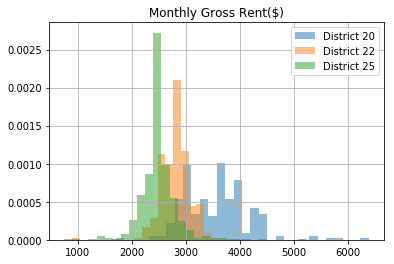

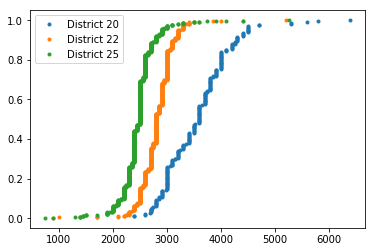

In [169]:
fig_hist, ax_hist = plt.subplots()
fig_cdf, ax_cdf = plt.subplots()

for name, group in groupedby_district:
    label='District {}'.format(name)
    _ = group.hist(column='Monthly Gross Rent($)',ax=ax_hist, bins=30, alpha=0.5, label=label,normed=True)
    # compute ECDF for the Unit Price data for each group
    x, y = ecdf(group['Monthly Gross Rent($)'])
    # generate ECDF plot
    _ = ax_cdf.plot(x,y,marker='.',linestyle='none',label=label)

#put legends in the plots
_ = ax_hist.legend()
_ = ax_cdf.legend()


### Medians, quartiles and boxplots

D:\Miniconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


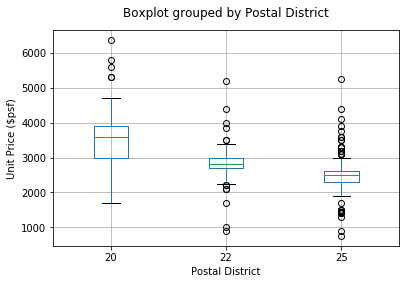

In [167]:
fig, ax = plt.subplots()

ax = housing_data.boxplot(column='Monthly Gross Rent($)',by='Postal District',ax=ax)
_ = ax.set_title('') #this is just to fix the messy title generated by the .boxplot function
_ = ax.set_ylabel('Unit Price ($psf)')


As seen here, the median (or the middle green line of the boxes) that houses from district 25 tend to be lower than districts 20 and 22. The circles represent data outside of the 'whiskers' of the boxplots, suggesting they are outliers. Note that these outliers might still be important in making our models, so we just keep it for this exercise.

## Now to the 'sexy' part of data science, or is it?